In [92]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [93]:
# load and preview data
df = pd.read_csv('./Breast_cancer_data.csv')
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [94]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [95]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [96]:
df.kurtosis()

mean_radius        0.845522
mean_texture       0.758319
mean_perimeter     0.972214
mean_area          3.652303
mean_smoothness    0.855975
diagnosis         -1.726811
dtype: float64

<AxesSubplot:>

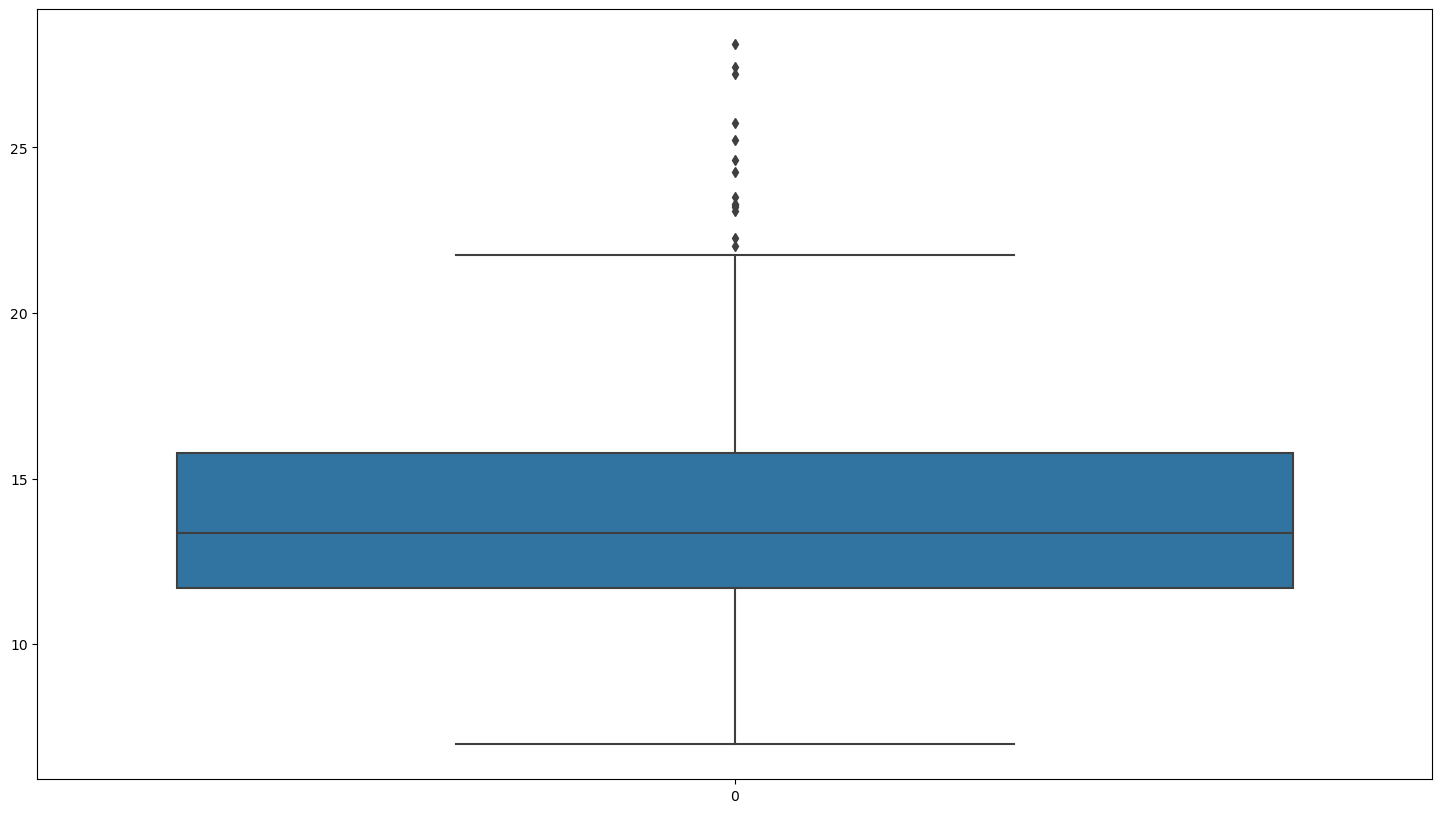

In [97]:
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(df['mean_radius'])

<AxesSubplot:>

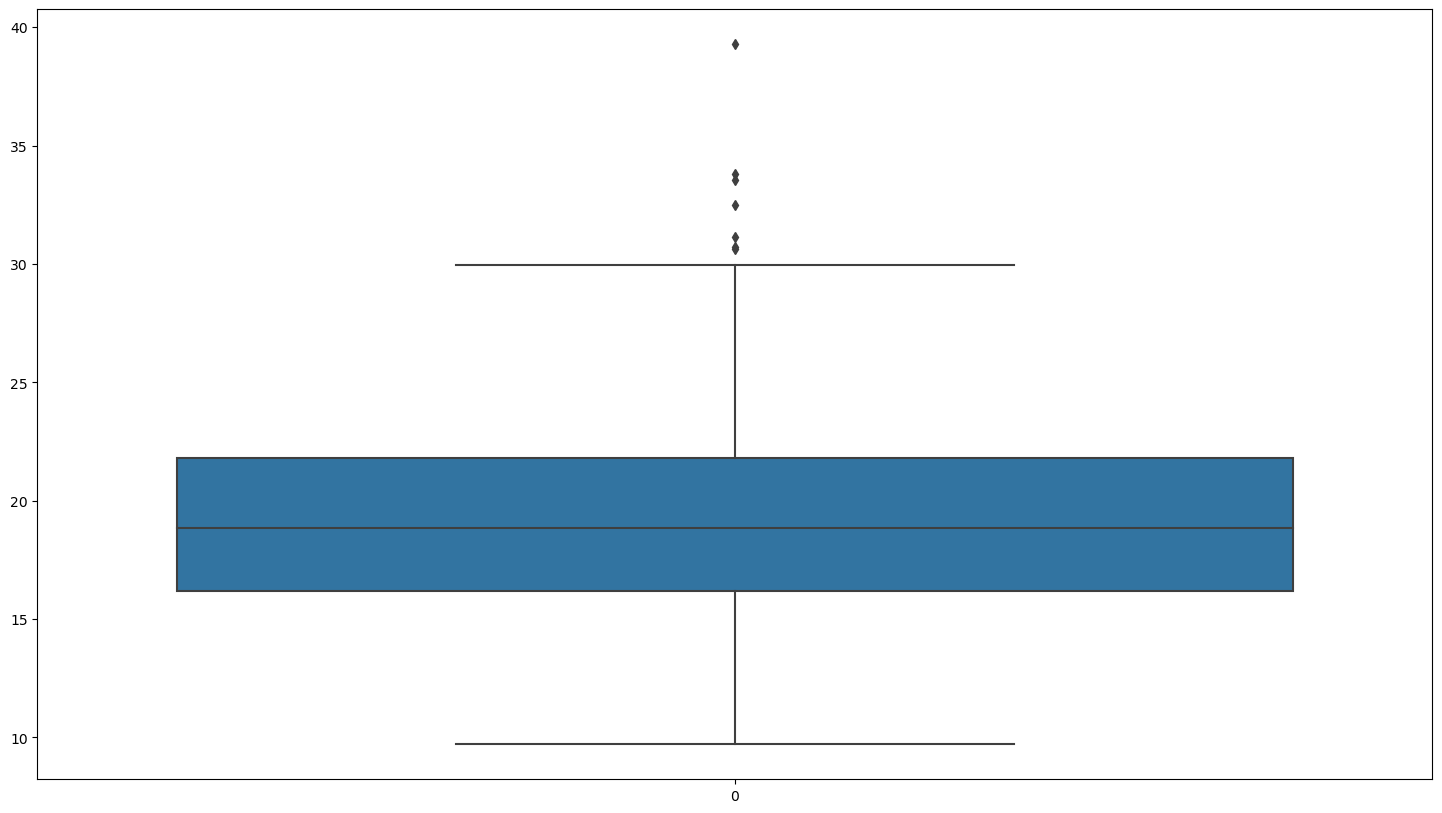

In [98]:
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(df['mean_texture'])

<AxesSubplot:>

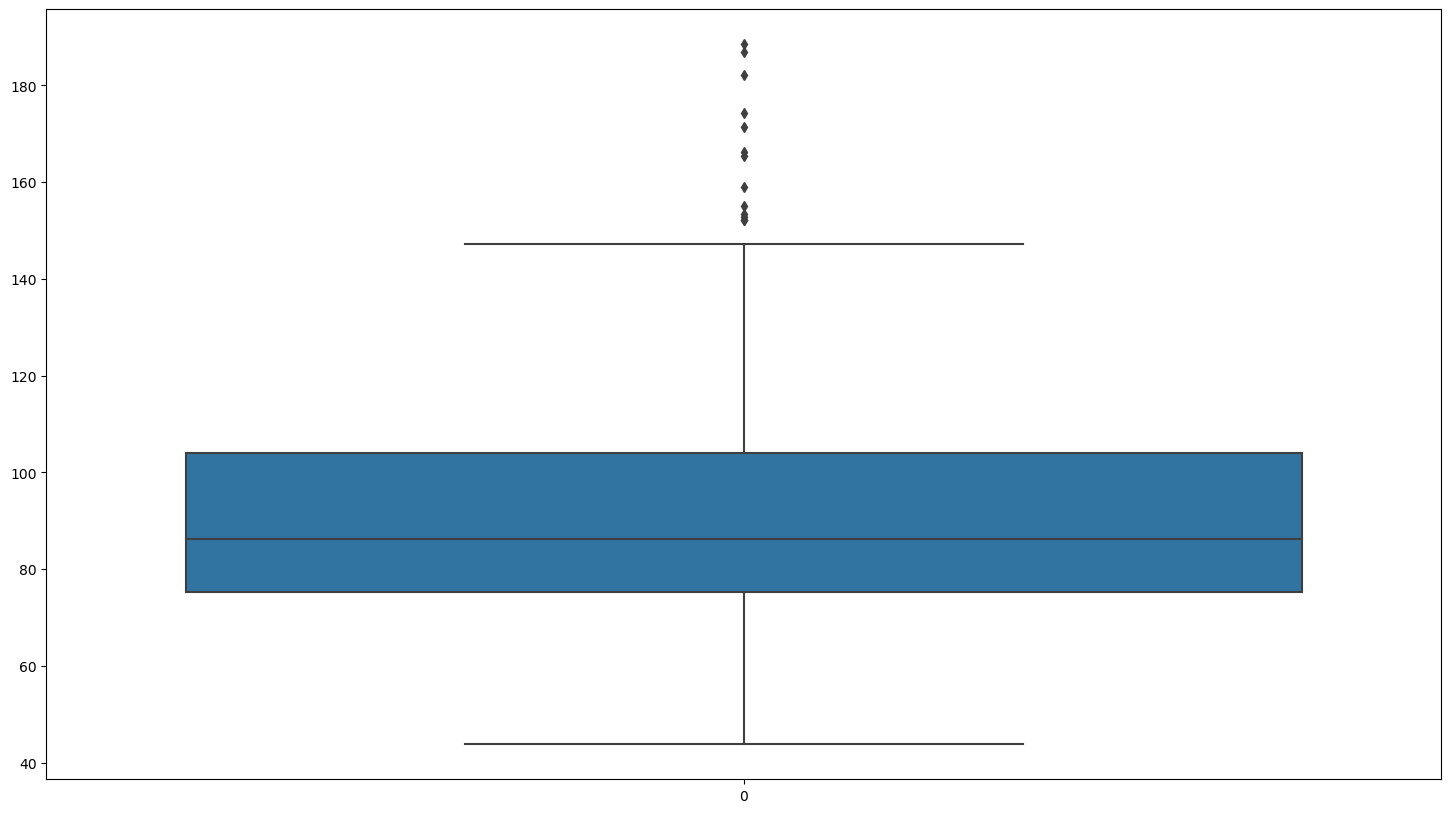

In [99]:
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(df['mean_perimeter'])

<AxesSubplot:>

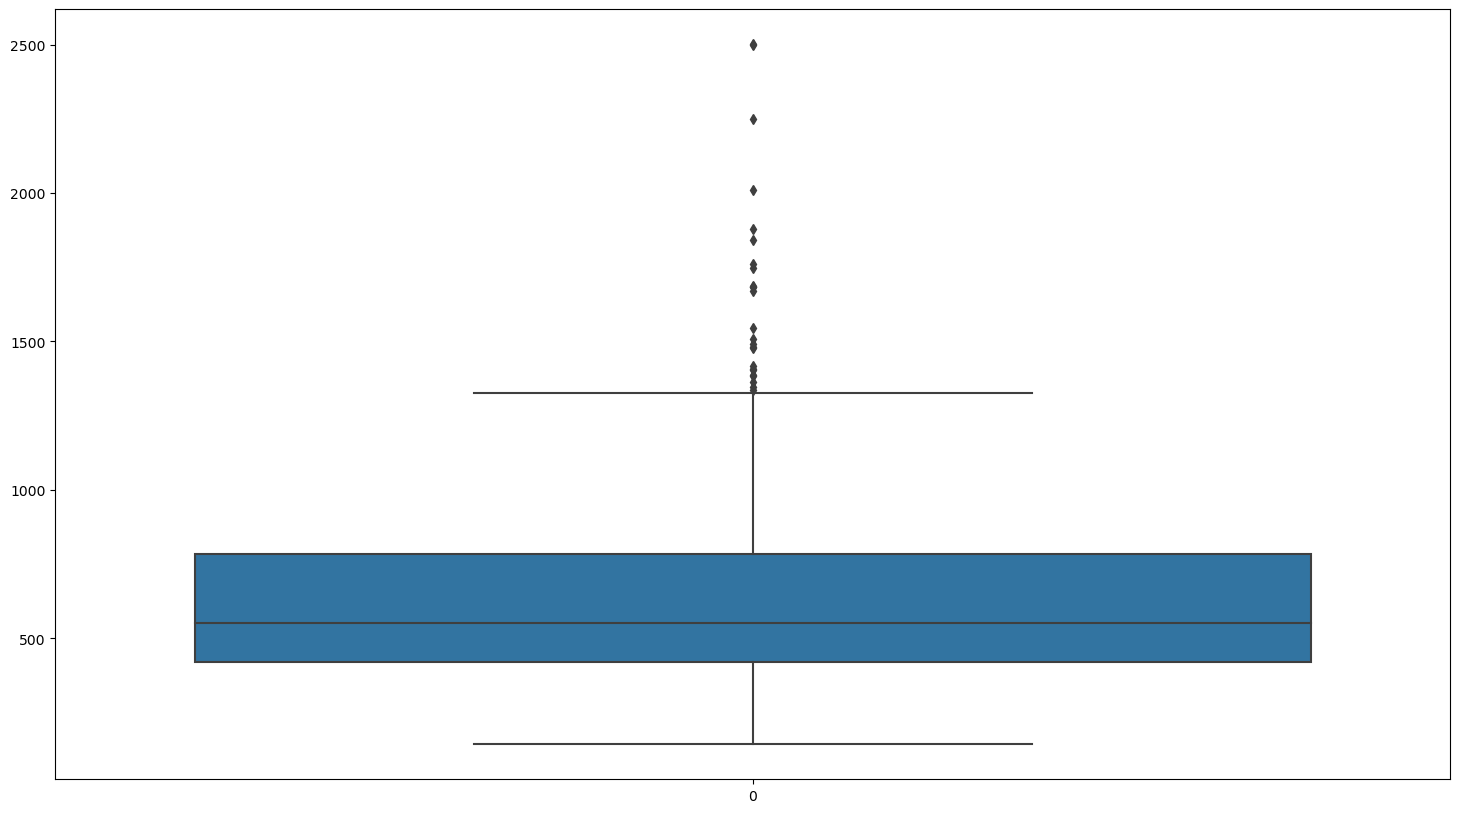

In [100]:
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(df['mean_area'])

<AxesSubplot:>

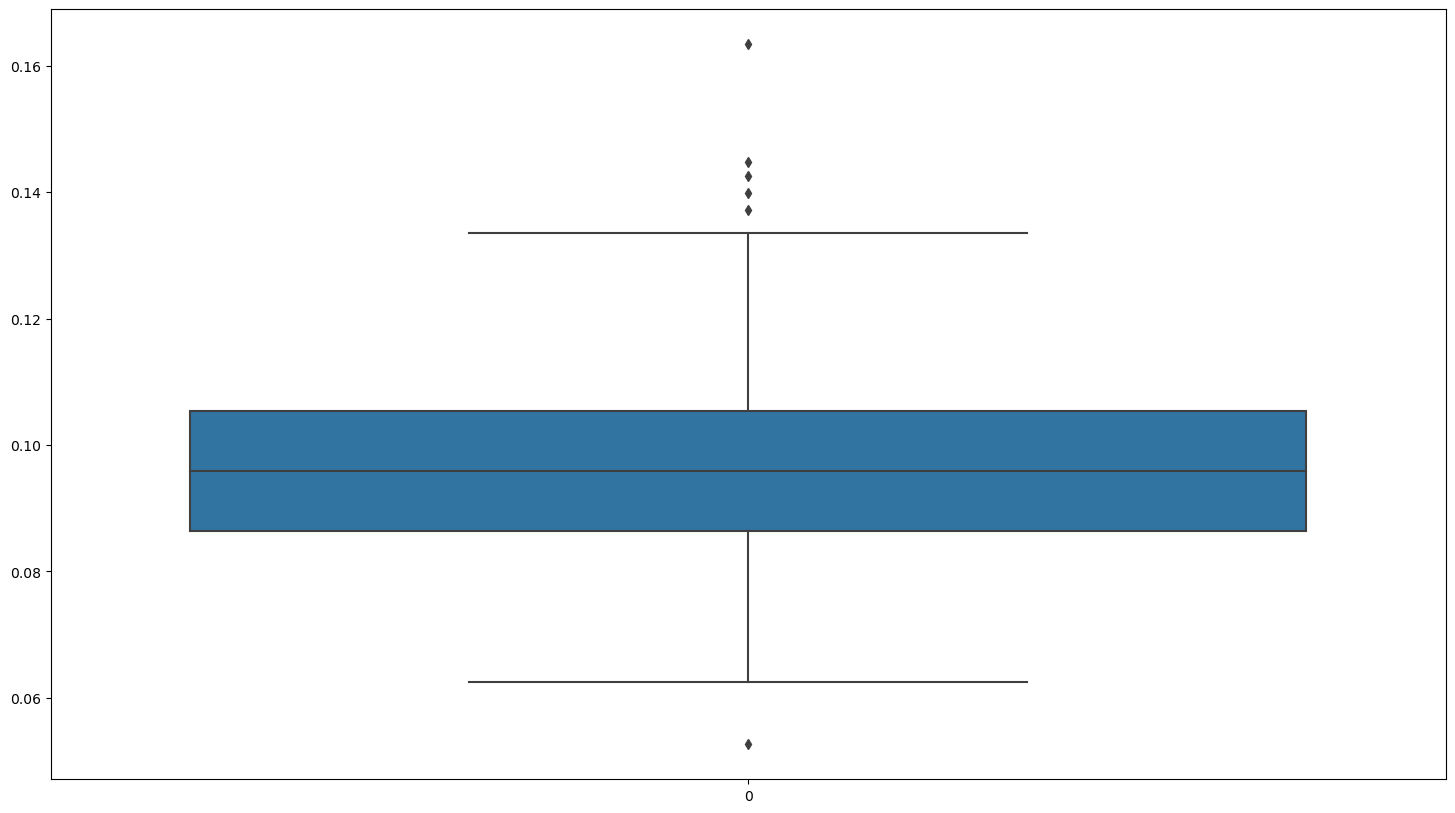

In [101]:
fig, ax = plt.subplots(figsize = (18,10))
sns.boxplot(df['mean_smoothness'])

In [102]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

In [103]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# print(X_train.iloc[338])

In [104]:
models = []
score = []



In [105]:
# build the lightgbm model
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [106]:
models.append(lgbm)

In [107]:
# predict the results
y_pred=lgbm.predict(X_test)


In [108]:
# view accuracy
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9649


In [109]:
y_pred_train = lgbm.predict(X_train)
score.append(accuracy)

In [110]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [111]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lgbm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lgbm.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9649


In [112]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[36  3]
 [ 1 74]]

True Positives(TP) =  36

True Negatives(TN) =  74

False Positives(FP) =  3

False Negatives(FN) =  1


<AxesSubplot:>

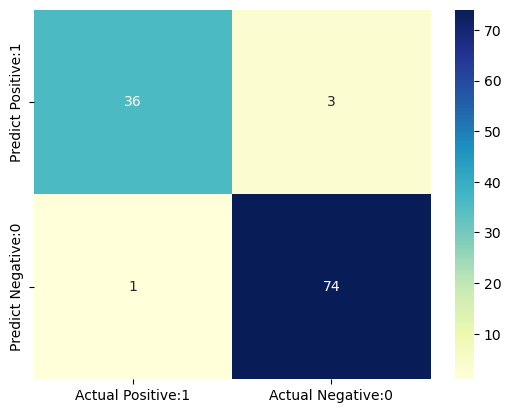

In [113]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [114]:
X_test

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
405,10.940,18.59,70.39,370.0,0.10040
523,13.710,18.68,88.73,571.0,0.09916
45,18.650,17.60,123.70,1076.0,0.10990
338,10.050,17.53,64.41,310.8,0.10070
524,9.847,15.68,63.00,293.2,0.09492
...,...,...,...,...,...
372,21.370,15.10,141.30,1386.0,0.10010
442,13.780,15.79,88.37,585.9,0.08817
477,13.900,16.62,88.97,599.4,0.06828
468,17.600,23.33,119.00,980.5,0.09289


In [115]:
test_df = pd.DataFrame()
test_df = X_test[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']].copy()
test_df['diagnosis'] = y_test
test_df.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
405,10.940,18.59,70.39,370.0,0.10040,1
523,13.710,18.68,88.73,571.0,0.09916,1
45,18.650,17.60,123.70,1076.0,0.10990,0
338,10.050,17.53,64.41,310.8,0.10070,1
524,9.847,15.68,63.00,293.2,0.09492,1


## Naive Bayes model

In [116]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred2 = nb.predict(X_test)

In [118]:
accuracy=accuracy_score (y_test,y_pred2)
print('Naive Bayes Model accuracy score: {0:0.4f}'.format(accuracy))

Naive Bayes Model accuracy score: 0.9386


In [119]:
y_pred_train = nb.predict(X_train)
score.append(accuracy)

In [120]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8945


In [121]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(nb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(nb.score(X_test, y_test)))

Training set score: 0.8945
Test set score: 0.9386


In [122]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[33  6]
 [ 1 74]]

True Positives(TP) =  33

True Negatives(TN) =  74

False Positives(FP) =  6

False Negatives(FN) =  1


<AxesSubplot:>

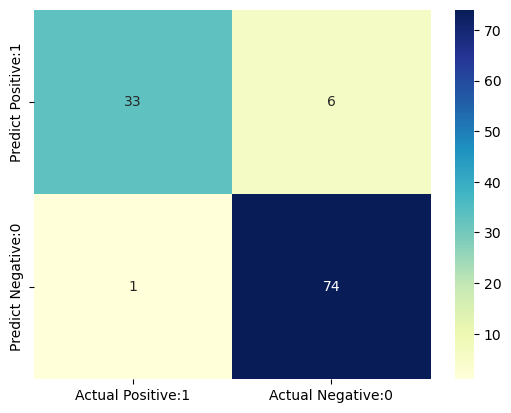

In [123]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# #neural network

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam


In [125]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [126]:
# define the keras model
nn = Sequential()
nn.add(Dense(5, input_shape=(5,), activation='sigmoid'))
nn.add(Dense(15, activation='sigmoid'))
nn.add(Dense(1, activation='sigmoid'))



In [127]:
adm = Adam(learning_rate=0.01)
nn.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate=0.05, momentum=0.8), metrics=['accuracy'])


In [128]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20),
    # tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
nn.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1500, batch_size=150 ,callbacks=my_callbacks)


2022-11-08 16:40:16.234526: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-11-08 16:40:16.234536: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-11-08 16:40:16.234936: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-11-08 16:40:16.348349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/1500
4/4 [==============================] - 0s 61ms/step - loss: 0.6841 - accuracy: 0.6198 - val_loss: 0.6675 - val_accuracy: 0.6579
Epoch 2/1500
1/4 [======>.......................] - ETA: 0s - loss: 0.6780 - accuracy: 0.6067

2022-11-08 16:40:16.449788: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-11-08 16:40:16.449800: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-11-08 16:40:16.482297: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-08 16:40:16.482766: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-11-08 16:40:16.484105: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/train/plugins/profile/2022_11_08_16_40_16
2022-11-08 16:40:16.484449: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2022_11_08_16_40_16/h-MacBook-Pro-sl-gil.local.trace.json.gz
2022-11-08 16:40:16.484986: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/train/plugins/profile/2022_11_08_16_40_16
2022-11-08 

4/4 [==============================] - 0s 11ms/step - loss: 0.6731 - accuracy: 0.6198 - val_loss: 0.6515 - val_accuracy: 0.6579
Epoch 3/1500
4/4 [==============================] - 0s 13ms/step - loss: 0.6673 - accuracy: 0.6198 - val_loss: 0.6443 - val_accuracy: 0.6579
Epoch 4/1500
4/4 [==============================] - 0s 11ms/step - loss: 0.6685 - accuracy: 0.6198 - val_loss: 0.6443 - val_accuracy: 0.6579
Epoch 5/1500
4/4 [==============================] - 0s 11ms/step - loss: 0.6667 - accuracy: 0.6198 - val_loss: 0.6485 - val_accuracy: 0.6579
Epoch 6/1500
4/4 [==============================] - 0s 11ms/step - loss: 0.6665 - accuracy: 0.6198 - val_loss: 0.6538 - val_accuracy: 0.6579
Epoch 7/1500
4/4 [==============================] - 0s 12ms/step - loss: 0.6665 - accuracy: 0.6198 - val_loss: 0.6493 - val_accuracy: 0.6579
Epoch 8/1500
4/4 [==============================] - 0s 13ms/step - loss: 0.6667 - accuracy: 0.6198 - val_loss: 0.6517 - val_accuracy: 0.6579
Epoch 9/1500
4/4 [========

In [129]:
# evaluate the keras model
_, accuracy = nn.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 10ms/step - loss: 0.1617 - accuracy: 0.9386
Accuracy: 93.86


In [130]:

score.append(accuracy)

In [131]:
print(score)

[0.9649122807017544, 0.9385964912280702, 0.9385964870452881]


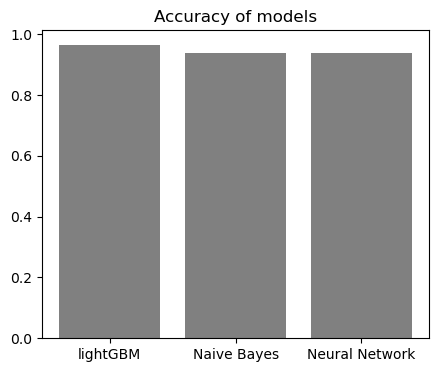

In [132]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



mod_name = ['lightGBM', 'Naive Bayes','Neural Network']
fig = plt.figure(figsize =(5, 4))
plt.bar(mod_name, score, color ='gray')
plt.title("Accuracy of models")
plt.show()

In [133]:
def save_model_to_db(model, client, db, dbconnection, model_name,score):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)

    #saving model to mongoDB
    # creating connection
    
    myclient = pymongo.MongoClient(client,serverSelectionTimeoutMS = 10000) # 10 second timeout)
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({model_name: pickled_model, 'name': model_name, 'created_time':time.time(),'score': score})
    print(f'{model_name} saved with this id: {info.inserted_id} successfully!'+' and score: ',score)
    


In [134]:
#saving model to mongo
import pymongo
import pickle
from tensorflow.keras.models import Sequential, model_from_json

save_model_to_db(model = lgbm, client = 'mongodb+srv://username:<password>@cluster0.vgt8rtj.mongodb.net/test', db = 'ML_database',
dbconnection = 'customers', model_name = 'lightGBM', score = round(score[0],4))

save_model_to_db(model = nb, client = 'mongodb+srv://username:<password>@cluster0.vgt8rtj.mongodb.net/test', db = 'ML_database',
dbconnection = 'customers', model_name = 'naive_bayes', score = round(score[1],4))

# serialize model to JSON
model_json = nn.to_json()

pickled_model = pickle.dumps(model_json)

save_model_to_db(model = model_json, client = 'mongodb+srv://username:<password>@cluster0.vgt8rtj.mongodb.net/test', db = 'ML_database',
dbconnection = 'customers', model_name = 'neural_network', score = round(score[2],4))


lightGBM saved with this id: 636a6a644ec883b9b294e928 successfully! and score:  0.9649
naive_bayes saved with this id: 636a6a674ec883b9b294e92a successfully! and score:  0.9386
neural_network saved with this id: 636a6a684ec883b9b294e92c successfully! and score:  0.9386
